<a href="https://colab.research.google.com/github/sharadv99/capstone-OpioidAddictionRisk/blob/master/Initial_Data_Prep_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [0]:
#Read in all survey data from 2015-2017
with zipfile.ZipFile("NSDUH-2017-DS0001-bndl-data-tsv.zip") as z:
    data_2017 = pd.read_csv(z.open("NSDUH_2017_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2016-DS0001-bndl-data-tsv.zip") as z:
    data_2016 = pd.read_csv(z.open("NSDUH_2016_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2015-DS0001-bndl-data-tsv.zip") as z:
    data_2015 = pd.read_csv(z.open("NSDUH_2015_Tab.tsv"), sep="\t", low_memory= False)

In [0]:
#verify shapes
print(data_2017.shape)
print(data_2016.shape)
print(data_2015.shape) #cols that werent collected in 2016 and 2017 need to be removed

(56276, 2668)
(56897, 2668)
(57146, 2679)


In [0]:
#Based on PUFVariableCrossWalk2017 there are inconsistent column headers - change to match 2017
data_2015.rename(columns={"COLLENRST": 'COLLENRLST', 'COLLENRFT': 'COLLENRLFT'}, inplace=True)

In [0]:
#data = pd.concat([data_2017, data_2016], ignore_index= True)

In [0]:
#columns in 2016 that arent in 2017
data_2016.columns.difference(data_2017.columns)

Index(['PNROTNMYR3', 'SEDOTNMYR3', 'STMOTNMYR3', 'TRQOTNMYR3'], dtype='object')

In [0]:
#columns in 2017 that arent in 2016
data_2017.columns.difference(data_2016.columns)

Index(['EDUSCKCOM', 'EDUSCKEST', 'EDUSKPCOM', 'EDUSKPEST'], dtype='object')

In [0]:
#columns in 2016/2017 that arent in 2015
data_2017.columns.difference(data_2015.columns)

Index(['CODEPDAPYU', 'CODEPDPYMU', 'DRVINAGE', 'DRVINALCO', 'DRVINALCO2',
       'DRVINALDRG', 'DRVINALON', 'DRVINCOCN', 'DRVINDETAG', 'DRVINDRG',
       'DRVINDROTMJ', 'DRVINHALL', 'DRVINHERN', 'DRVININHL', 'DRVINMARJ',
       'DRVINMARJ2', 'DRVINMETH', 'EDUFULPAR', 'EDUSCHGRD2', 'EDUSCHLGO',
       'EDUSCKCOM', 'EDUSCKEST', 'EDUSCKMON', 'EDUSKPCOM', 'EDUSKPEST',
       'EDUSKPMON', 'IIMARIT', 'IRMARIT', 'MILTCHLDR', 'MILTFAMLY',
       'MILTPARNT', 'MILTSIBLN', 'MILTSPPAR', 'NOMARR2', 'PNRNMLAS1',
       'STMNMLAS1', 'TRQNMLAS1'],
      dtype='object')

In [0]:
#columns in 2015 that arent in 2016/2017
data_2015.columns.difference(data_2017.columns)

Index(['BUSPPDAPYU', 'BUSPPDPYMU', 'DRVINFALC', 'DRVINFALD', 'DRVINFDRG',
       'DRVUNDALC', 'DRVUNDALD', 'DRVUNDDRG', 'EDUENROLL', 'EDUFULPRT',
       'EDUGRDNOW2', 'EDUSICKMO', 'EDUSKIPMO', 'HYDRPDAPYU', 'HYDRPDPYMU',
       'IIMARITSTAT', 'IRMARITSTAT', 'MARIEDNUM2', 'MEPRPDAPYU', 'MILBROTHR',
       'MILDAUGHT', 'MILFAMILY', 'MILFATHER', 'MILMOTHER', 'MILOTHFAM',
       'MILPARTNR', 'MILSISTER', 'MILSON', 'MILSPOUSE', 'OXCNANYYR2',
       'OXCNNMYR2', 'OXYCPDAPYU', 'OXYCPDPYMU', 'PNRAVDAYPM', 'PNRINWOUD',
       'PNRNMLAST', 'PNRNMWOUD', 'PNRNMWUD', 'PNROTNMYR3', 'SEDAVDAYPM',
       'SEDOTNMYR3', 'STMAVDAYPM', 'STMNMLAST', 'STMOTNMYR3', 'TRQAVDAYPM',
       'TRQLLSEFX', 'TRQNMLAST', 'TRQOTNMYR3'],
      dtype='object')

**PNRNMLAS1, TRQNMLAS1 and STMNMLAS1 are 3 examples of name discrepancies between 2015 column headers and 2016/2017 column headers**

In [0]:
data_2016['TRQNMLAS1']

0        91
1         8
2        91
3        91
4        91
5        91
6        91
7        91
8        91
9        91
10       91
11       91
12       91
13       91
14       91
15       91
16        8
17       91
18       91
19       91
20       91
21       91
22       91
23       91
24       91
25       91
26       91
27       91
28        1
29       91
         ..
56867    91
56868    91
56869    91
56870    91
56871    91
56872    91
56873    91
56874    91
56875    91
56876    91
56877    91
56878    91
56879     8
56880    91
56881    91
56882    91
56883    91
56884    91
56885    91
56886    91
56887    91
56888    91
56889    91
56890    91
56891    91
56892    91
56893     1
56894    91
56895    91
56896    91
Name: TRQNMLAS1, Length: 56897, dtype: int64

In [0]:
dep_var_counts = data["PNRNMINIT"].astype("str").value_counts()

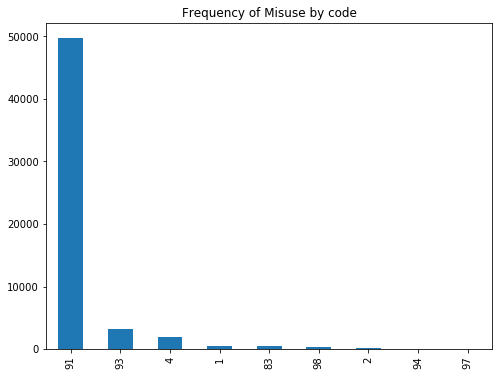

In [0]:
dep_var_counts.plot(kind='bar', figsize = (8,6), title= "Frequency of Misuse by code")

In [0]:
for i,j in list(dep_var_counts.to_dict().items()):
    print("{} makes up {}% of the total".format(i,100*j/sum(list(dep_var_counts.to_dict().values()))))

91 makes up 88.27208756841283% of the total
93 makes up 5.615182315729618% of the total
4 makes up 3.4295259080247353% of the total
1 makes up 0.9826569052526832% of the total
83 makes up 0.8618238680787547% of the total
98 makes up 0.44779302011514677% of the total
2 makes up 0.35539128580567203% of the total
94 makes up 0.023100433577368684% of the total
97 makes up 0.012438695003198521% of the total


In [0]:
unique_vals_per_col = data.nunique()

In [0]:
#x = Unique vals in a column   y = Number of cols that share that unique value
freq_counts = pd.Series(list(unique_vals_per_col)).value_counts().to_dict()
freq_counts = sorted(freq_counts.items())
freq_counts

[(1, 1),
 (2, 741),
 (3, 99),
 (4, 131),
 (5, 116),
 (6, 324),
 (7, 294),
 (8, 212),
 (9, 224),
 (10, 124),
 (11, 43),
 (12, 19),
 (13, 14),
 (14, 12),
 (15, 9),
 (16, 10),
 (17, 6),
 (18, 5),
 (19, 34),
 (20, 12),
 (21, 6),
 (22, 6),
 (23, 5),
 (24, 6),
 (25, 12),
 (26, 2),
 (27, 4),
 (28, 8),
 (29, 2),
 (30, 3),
 (31, 7),
 (32, 3),
 (33, 3),
 (34, 6),
 (35, 7),
 (36, 14),
 (37, 3),
 (38, 4),
 (39, 5),
 (41, 2),
 (42, 2),
 (43, 4),
 (46, 1),
 (47, 4),
 (48, 3),
 (49, 2),
 (50, 5),
 (51, 2),
 (52, 4),
 (53, 6),
 (54, 5),
 (55, 3),
 (56, 3),
 (57, 6),
 (58, 3),
 (59, 2),
 (60, 3),
 (61, 2),
 (62, 1),
 (64, 3),
 (65, 2),
 (66, 4),
 (67, 3),
 (68, 4),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 1),
 (75, 2),
 (76, 1),
 (80, 3),
 (81, 1),
 (82, 3),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 2),
 (88, 2),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 2),
 (93, 1),
 (94, 1),
 (101, 2),
 (121, 1),
 (126, 1),
 (127, 1),
 (128, 1),
 (133, 1),
 (155, 1),
 (158, 1),
 (167, 1),
 (195, 1),
 (196, 1),
 (

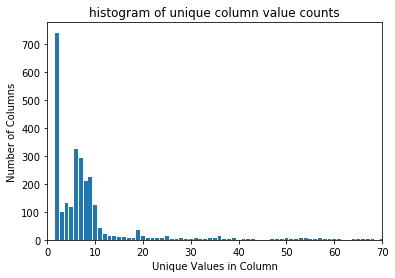

In [0]:
plt.bar(list(x), list(y))
plt.xlim([0,70])
plt.title("histogram of unique column value counts")
plt.xlabel("Unique Values in Column")
plt.ylabel("Number of Columns")

In [0]:
def convert_to_int(df_col):
    return df_col.astype("int64")

0        91
1        91
2        91
3        91
4        91
5        91
6        91
7        83
8        91
9        91
10       91
11       91
12       91
13       91
14       91
15       91
16       91
17       91
18       93
19       91
20       91
21       91
22       91
23       93
24       91
25       91
26       91
27       91
28       91
29       91
         ..
56246    91
56247    91
56248    91
56249    91
56250    91
56251     4
56252    91
56253    91
56254    91
56255    91
56256    91
56257    91
56258    91
56259    91
56260    91
56261    91
56262    91
56263    91
56264    91
56265    91
56266    91
56267    91
56268    91
56269    93
56270    91
56271    91
56272    91
56273    91
56274    91
56275    91
Name: PNRNMINIT, Length: 56276, dtype: category
Categories (9, int64): [1, 2, 4, 83, ..., 93, 94, 97, 98]